
##  ML Assignment #2 

### <font color =blue > Group ID : ML_GROUP006 </font>
### Group Members:

1. Ponvani : 2018AC04559
2. Bala Kavin Pon : 2018AC04531
2. Poornima J : 2018AC04550
2. Venkataramanan Krishnan : 2018AC04529

## Problem Statement: Predict whether the patient has diabetes or not.

### Import the data from Indian diabetes dataset (Links to an external site.) and find dataset description from here (Links to an external site.) (2 points).

#### Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point).

#### Do Feature Scaling on Independent variables (2 points).

#### Split the data into train and test dataset (1 point).

#### Use Keras to make the neural network model and train the dataset on the same. (4 points).

#### Compute the accuracy and confusion matrix. (2 points).

## Import Libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.externals import joblib

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

## Step 1: Loading Data

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None);
print(df)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


### Adding Header to the data

In [48]:
df.columns = ["pregnancies_times", "glucose", "bp", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

,pregnancies_times,glucose,bp,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.shape

(768, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies_times             768 non-null int64
glucose                       768 non-null int64
bp                            768 non-null int64
skin_thickness                768 non-null int64
insulin                       768 non-null int64
bmi                           768 non-null float64
Diabetes_Pedigree_Function    768 non-null float64
age                           768 non-null int64
outcome                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies_times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


 Glucose,BP,skin_thickness,Insulin & bmi have min value as 0 which does not seem to be a valid value for these attributes so replace these values with atrribute mean values

In [52]:
for cols in ['glucose','bp','skin_thickness','insulin','bmi']:
    df.loc[df[cols] == 0,cols]= df[cols].mean(skipna=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies_times,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
bp,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
skin_thickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
bmi,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


### Find Correlation with the class variable

In [53]:
df.corr()

,pregnancies_times,glucose,bp,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
pregnancies_times,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
bp,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
skin_thickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
bmi,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
Diabetes_Pedigree_Function,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


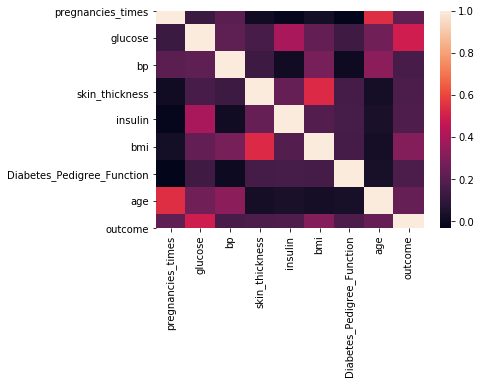

In [54]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

### Extract X and Y colummns

In [55]:
from sklearn.model_selection import train_test_split
Y = df['outcome']
X = df.drop(columns=['outcome'])

### Test Train Split 

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
print('X_train size {} , X_test size {}'.format(X_train.shape,X_test.shape))

X_train size (537, 8) , X_test size (231, 8)


### Normalizing the data

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [58]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64


# Neural network

In [59]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the keras model

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the keras model on the dataset

In [61]:
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 1s 834us/step - loss: 0.6538 - acc: 0.6667
Epoch 2/150
768/768 [==============================] - 0s 224us/step - loss: 0.5830 - acc: 0.7109
Epoch 3/150
768/768 [==============================] - 0s 203us/step - loss: 0.5317 - acc: 0.7474
Epoch 4/150
768/768 [==============================] - 0s 193us/step - loss: 0.4995 - acc: 0.7643
Epoch 5/150
768/768 [==============================] - 0s 203us/step - loss: 0.4791 - acc: 0.7604
Epoch 6/150
768/768 [==============================] - 0s 203us/step - loss: 0.4677 - acc: 0.7721
Epoch 7/150
768/768 [==============================] - 0s 305us/step - loss: 0.4609 - acc: 0.7721
Epoch 8/150
768/768 [==============================] - 0s 224us/step - loss: 0.4560 - acc: 0.7786
Epoch 9/150
768/768 [==============================] - 0s 203us/step - loss: 0.4525 - acc: 0.7747
Epoch 10/150
768/768 [==============================] - 0s 244us/step - loss: 0.4495 - acc: 0.7812
Epoch 11/150
768/76

## Accuracy Calculation  -- Evaluate the keras model

In [62]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 264us/step
Accuracy: 84.64


### Make probability predictions with the model

In [63]:
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

### Make class predictions (y) with the model

In [69]:
y_pred = model.predict_classes(X)

## Confustion Matrix

In [70]:
from sklearn import metrics
print(metrics.confusion_matrix(Y, y_pred))
TN, FP, FN, TP = metrics.confusion_matrix(Y, y_pred).ravel()
(TN, FP, FN, TP)

[[450  50]
 [ 68 200]]


(450, 50, 68, 200)

## Classification Accuracy: Overall, how often is the classifier correct?

In [71]:

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(Y, y_pred))

0.8463541666666666
0.8463541666666666


### Classification Error: Overall, how often is the classifier incorrect Also known as "Misclassification Rate"

In [73]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(Y, y_pred))

0.15364583333333334
0.15364583333333337


## Sensitivity:
### When the actual value is positive, how often is the prediction correct

In [74]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(Y, y_pred))

0.746268656716418
0.746268656716418


## Specificity:
### When the actual value is negative, how often is the prediction correct

In [75]:
specificity = TN / (TN + FP)
print(specificity)

0.9


### False Positive Rate: When the actual value is negative, how often is the prediction incorrect false_positive_rate = FP / float(TN + FP)

In [77]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.1
0.09999999999999998


### Precision: When a positive value is predicted, how often is the prediction correct

In [78]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(Y, y_pred))

0.8
0.8
